<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/2.FNN/%5B%EC%9D%98%EB%A3%8C_AI%5D_BMI(%EB%B9%84%EB%A7%8C%EB%8F%84)_%EB%B6%84%EC%84%B1%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%82%A4%2C_%EC%B2%B4%EC%A4%91_%EC%B6%94%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[7장] FNN 활용하기/2_7_2_[의료 AI] BMI(비만도) 분석을 위한 키, 체중 추론 AI

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[7장] FNN 활용하기/2_7_2_[의료 AI] BMI(비만도) 분석을 위한 키, 체중 추론 AI


In [2]:
from tensorflow import keras
import data_reader

In [3]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 50입니다.

In [4]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()



Data Read Done!
Training X Size : (134384, 6)
Training Y Size : (134384, 2)
Test X Size : (33596, 6)
Test Y Size : (33596, 2)




In [5]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(6),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(2, activation='sigmoid')
])

In [6]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [7]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/50
4200/4200 [==============================] - 15s 3ms/step - loss: 0.0011 - mae: 0.0201 - val_loss: 6.5804e-04 - val_mae: 0.0153
Epoch 2/50
4200/4200 [==============================] - 14s 3ms/step - loss: 6.8248e-04 - mae: 0.0164 - val_loss: 6.9179e-04 - val_mae: 0.0180
Epoch 3/50
4200/4200 [==============================] - 15s 3ms/step - loss: 6.6343e-04 - mae: 0.0160 - val_loss: 6.2486e-04 - val_mae: 0.0148
Epoch 4/50
4200/4200 [==============================] - 14s 3ms/step - loss: 6.5564e-04 - mae: 0.0159 - val_loss: 7.0683e-04 - val_mae: 0.0160
Epoch 5/50
4200/4200 [==============================] - 15s 3ms/step - loss: 6.5415e-04 - mae: 0.0158 - val_loss: 6.3524e-04 - val_mae: 0.0148
Epoch 6/50
4200/4200 [==============================] - 14s 3ms/step - loss: 6.4472e-04 - mae: 0.0157 - val_loss: 6.0391e-04 - val_mae: 0.0145
Epoch 7/50
4200/4200 [==============================] - 14s 3ms/step - loss: 6.4084e-04 - mae: 0.0157 

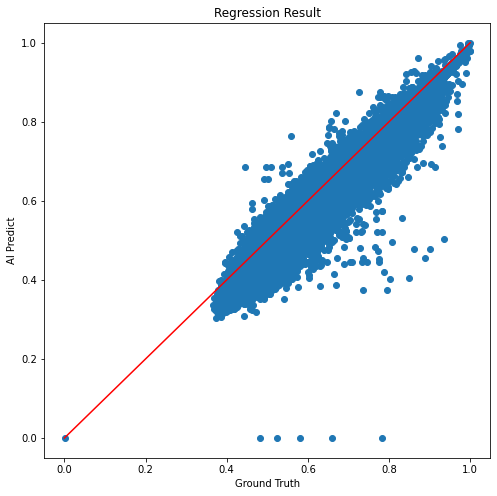

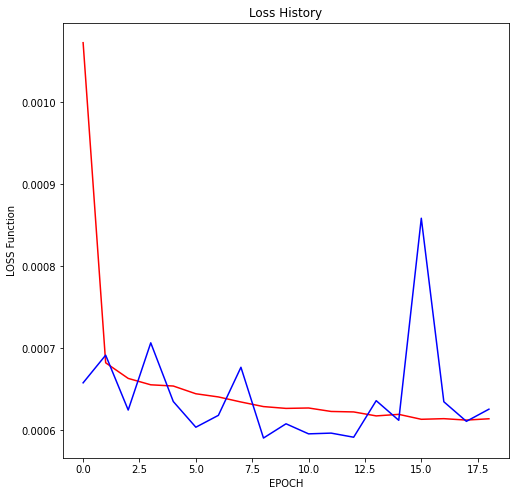

In [8]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)

#하이퍼 파라미터 수정 (신경망 크기)

높은 층으로 갈수록 신경망 크기 증가

In [9]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(6),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(2, activation='sigmoid')
])

In [10]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [11]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/50
4200/4200 [==============================] - 9s 2ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 7.3892e-04 - val_mae: 0.0173
Epoch 2/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.7484e-04 - mae: 0.0167 - val_loss: 6.4057e-04 - val_mae: 0.0170
Epoch 3/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.5636e-04 - mae: 0.0163 - val_loss: 6.0876e-04 - val_mae: 0.0144
Epoch 4/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.5069e-04 - mae: 0.0161 - val_loss: 8.6927e-04 - val_mae: 0.0192
Epoch 5/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.4348e-04 - mae: 0.0159 - val_loss: 6.7168e-04 - val_mae: 0.0174
Epoch 6/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.3841e-04 - mae: 0.0157 - val_loss: 6.7422e-04 - val_mae: 0.0185
Epoch 7/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.3403e-04 - mae: 0.0156 - val_l

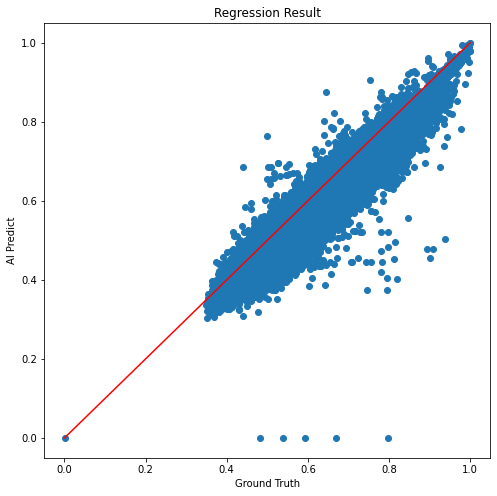

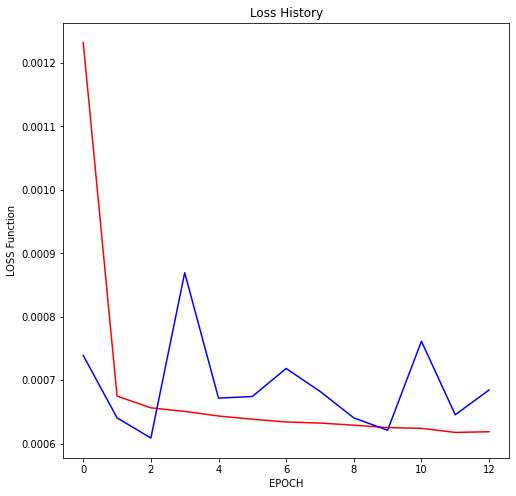

In [12]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)

높은 층으로 갈수록 신경망 크기 감소

In [13]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(6),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(2, activation='sigmoid')
])

In [14]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [15]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/50
4200/4200 [==============================] - 10s 2ms/step - loss: 0.0014 - mae: 0.0225 - val_loss: 6.9136e-04 - val_mae: 0.0161
Epoch 2/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.6370e-04 - mae: 0.0161 - val_loss: 6.2916e-04 - val_mae: 0.0144
Epoch 3/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.4776e-04 - mae: 0.0158 - val_loss: 6.0162e-04 - val_mae: 0.0146
Epoch 4/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.3784e-04 - mae: 0.0156 - val_loss: 6.0203e-04 - val_mae: 0.0142
Epoch 5/50
4200/4200 [==============================] - 8s 2ms/step - loss: 6.3769e-04 - mae: 0.0156 - val_loss: 6.5338e-04 - val_mae: 0.0150
Epoch 6/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.2868e-04 - mae: 0.0154 - val_loss: 6.1067e-04 - val_mae: 0.0149
Epoch 7/50
4200/4200 [==============================] - 9s 2ms/step - loss: 6.2733e-04 - mae: 0.0154 - val_

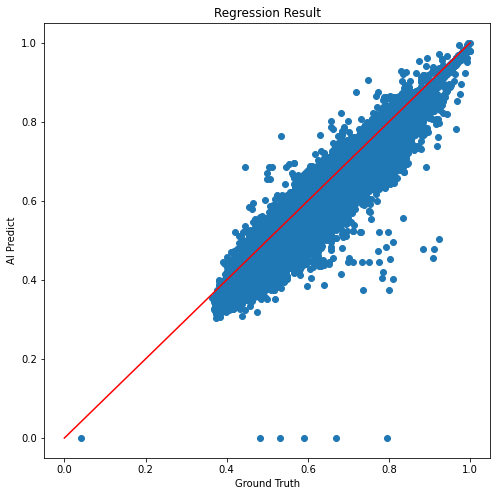

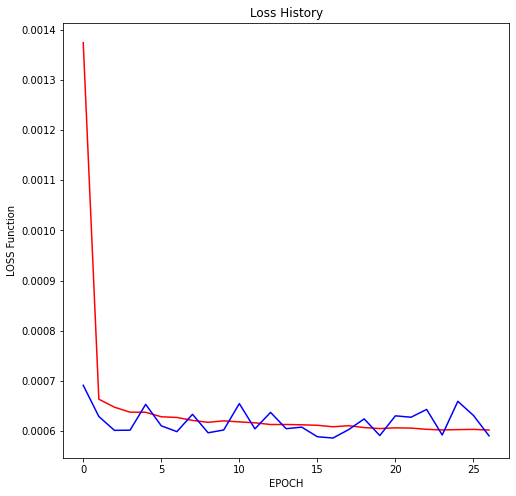

In [16]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)